# Soldier_Race Project with Logistic Regression and SVM

## Introduction

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier 
Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 
and is comprised of personnel representing the total US Army force to include the US Army 
Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic 
data described below, the ANSUR II database also consists of 3D whole body, foot, and head 
scans of Soldier participants. 

The ANSUR II working databases contain 93 anthropometric measurements which were 
directly measured, and 15 demographic/administrative variables explained below. The 
ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II 
Female working database contains a total sample of 1,986 subjects. The databases are reported in 
the associated spreadsheet files: 
* a. “ANSUR II MALE Public.csv” 
* b. “ANSUR II FEMALE Public.csv”

#### Data Content
Demographic/Administrative Data: The following variables are included in the ANSUR II working databases for each subject and were assigned to or collected from subjects at the time of their participation. 
* subjectid – A unique number for each participant measured in the anthropometric survey,  ranging from 10027 to 920103, not inclusive
* SubjectBirthLocation – Subject Birth Location; a U.S. state or foreign country
* SubjectNumericRace – Subject Numeric Race; a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other
* Ethnicity – self-reported ethnicity (verified through interview); e.g. “Mexican”, “Vietnamese”
* DODRace – Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option.This variable is intended to be comparable to the Defense Manpower Data Center  demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other
* Gender – “Male” or “Female”
* Age – Participant’s age in years
* Heightin – Height in Inches; self-reported, comparable to measured “stature”
* Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”
* WritingPreference – Writing Preference; “Right hand”, “Left hand”, or “Either hand (No preference)”
* Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”
* Installation – U.S. Army installation where the measurement occurred; e.g. “Fort Hood”, “Camp Shelby” 
* Component – “Army National Guard”, “Army Reserve”, or “Regular Army”
* Branch – “Combat Arms”, “Combat Support”, or “Combat Service Support”
* PrimaryMOS – Primary Military Occupational Specialty

Anthropometric Data: the following variables are included in the ANSUR II working databases for each subject and were directly-measured dimensions of the participant’s body. All measurements are recorded in millimeters with the exception of the variable “weightkg”. 
For data dictionary, see https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

##  Main objectives of the Analysis
* In this project, I will first go through the ANSUR II data set. 
* After completing feature engineering part, I will implement Logistic Regression, then Support Vector Machines Model.
* I will also use scaling, GridSearchCV  and pipeline in this project. 
* In the end, I will compare and evaluate the scores obtained from these two models and suggest some alternative solutions.

## Import Libraries

In [20]:
!pip install pyforest
!pip install cufflinks
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1. Feature Engineering

### Read and Explore Data Sets

There are two data sets and we need to concat them.

In [21]:
df_male = pd.read_csv("ANSUR II MALE Public.csv",encoding='latin-1')
df_female = pd.read_csv("ANSUR II FEMALE Public.csv",encoding='latin-1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's check the columns to see the differences and simmilarities

In [22]:
df_male.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand


In [23]:
df_female.head(1)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


After I concat them, I will drop index and some columns which are dublicated or provide same information in dfferent names.

In [24]:
df = pd.concat([df_male, df_female])

<IPython.core.display.Javascript object>

In [25]:
df.shape

(6068, 109)

In [26]:
# Is tere any duplicated observation?
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1981    False
1982    False
1983    False
1984    False
1985    False
Length: 6068, dtype: bool

In [27]:
# Are there any missing values? 
df.isnull().sum().sort_values()

interscyei                           0
suprasternaleheight                  0
stature                              0
span                                 0
sleeveoutseam                        0
sleevelengthspinewrist               0
sittingheight                        0
shoulderlength                       0
shoulderelbowlength                  0
shouldercircumference                0
radialestylionlength                 0
tenthribheight                       0
poplitealheight                      0
overheadfingertipreachsitting        0
neckcircumferencebase                0
neckcircumference                    0
mentonsellionlength                  0
lowerthighcircumference              0
lateralmalleolusheight               0
lateralfemoralepicondyleheight       0
kneeheightsitting                    0
kneeheightmidpatella                 0
interscyeii                          0
palmlength                           0
thighcircumference                   0
thighclearance           

Yes,"subjectid" (1986), "SubjectId"(4082) and "Ethncity"(4647) have missing values. 

In [28]:
df.select_dtypes(include='object')

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
1981,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Mexican,Right hand
1982,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Mexican,Right hand
1983,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,NaN,Right hand
1984,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Mexican,Right hand


In [29]:
df.select_dtypes(exclude="object")

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1,1,41,71,180,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1,1,35,68,160,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,2,2,42,68,205,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1,1,31,66,175,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,2,2,21,77,213,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [30]:
# Let's drop some comlumns (for now 11 features)
dropped = ['subjectid', 'SubjectNumericRace', 'Ethnicity', 'Heightin', 'Weightlbs', 
           'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectId']

In [31]:
df.drop(columns=dropped, inplace=True)

In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
df.shape

(6068, 98)

Now we have 6068 rows and 98 columns. Our target variable is DODRace

In [34]:
df.sample(5)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
2655,284,1424,323,240,1308,247,189,390,347,273,495,77,345,338,138,1009,259,856,619,509,411,1492,264,1053,269,1260,822,631,364,30,64,22,241,773,107,254,327,291,596,448,1111,87,204,178,149,558,196,333,78,330,368,1019,600,430,441,470,531,467,74,401,127,383,418,1308,111,404,249,1121,351,138,874,860,570,1692,1719,1410,1106,638,187,782,432,126,864,1690,482,347,1032,265,390,1017,862,177,863,Male,Utah,1,24,Right hand
1202,298,1495,372,233,1356,254,202,439,370,281,544,74,324,319,146,1042,263,938,653,536,411,1579,302,1137,286,1341,885,628,378,32,62,22,206,793,100,274,368,328,621,499,1164,93,218,199,164,601,215,341,71,352,394,1119,640,475,495,501,581,511,71,425,116,425,470,1516,120,455,274,1260,401,153,918,967,643,1948,1809,1492,1174,651,189,864,496,137,950,1685,466,368,1050,275,419,1120,974,177,849,Male,Indiana,1,29,Left hand
4123,241,1375,308,221,1280,236,198,368,317,285,436,70,315,284,130,979,239,879,594,484,380,1430,294,991,266,1199,812,579,320,32,61,22,248,777,99,259,337,252,513,462,1088,79,183,186,147,559,194,321,64,331,392,1031,605,380,397,468,525,482,72,379,117,323,355,1338,111,402,254,1036,334,138,893,824,549,1694,1685,1372,1079,580,162,772,466,128,872,1556,444,303,869,224,389,1000,689,154,827,Female,California,1,28,Right hand
2930,221,1585,368,235,1473,262,219,453,357,284,528,84,332,321,135,1023,246,1005,662,540,413,1654,308,1066,261,1427,957,639,345,37,62,23,225,834,104,293,368,311,587,520,1248,91,216,208,157,604,209,365,75,337,384,1153,665,404,434,541,617,554,70,433,124,380,427,1525,124,485,288,1192,396,167,965,962,640,1928,1923,1576,1251,648,184,851,526,134,1022,1709,477,324,893,207,384,1199,924,175,935,Male,Kansas,1,23,Right hand
5508,277,1283,311,230,1190,231,179,367,349,279,489,66,324,322,129,1134,267,800,615,490,422,1336,290,1056,281,1128,744,642,353,34,59,15,230,708,88,243,300,282,555,430,1026,76,179,183,148,557,193,312,71,384,429,966,625,385,392,428,486,445,57,480,110,350,372,1209,106,340,229,1053,332,140,815,811,526,1621,1558,1293,1027,717,190,709,406,123,813,1568,420,338,973,262,382,934,804,148,756,Female,Ohio,2,46,Right hand


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0
bicristalbreadth,6068.0,274.735003,19.221034,197.0,262.00,274.0,288.00,362.0


In [36]:
# Let's check categories of target variable
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

I will implement machine learning models for just White, Black and Hispanic categories since the rest have limited observations.  

In [37]:
df.drop(df[df['DODRace'] >= 4].index, axis = 0, inplace=True)

In [38]:
df.shape

(5769, 98)

## 2. Train-Test Split

In [39]:
# I copy the original data before get_dummies 
df2=df.copy()

In [40]:
X = df.drop('DODRace',axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['DODRace']

<IPython.core.display.Javascript object>

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =y, random_state=42)

In [42]:
print("x train:", X_train.shape, "x test:", X_test.shape)
print("y train:", y_train.shape, "y test:", y_test.shape)

x train: (4615, 232) x test: (1154, 232)
y train: (4615,) y test: (1154,)


In [43]:
y.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

### Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Modelling

## 3.a) Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=10000, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42,
                   solver='liblinear')

In [26]:
y_pred = log_model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Let's see logistic regression model with confusion matrix

In [28]:
confusion_matrix(y_test,y_pred)

array([[694,  18,  46],
       [ 15, 244,   1],
       [ 43,   7,  86]], dtype=int64)

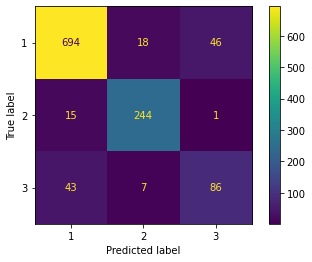

In [29]:
plot_confusion_matrix(log_model, X_test, y_test);

In [30]:
# Our train and test scores in Logistic Regression without cross validation
log_model_eval = eval_metric(log_model, X_train, y_train, X_test, y_test)
log_model_eval

Test_Set
[[694  18  46]
 [ 15 244   1]
 [ 43   7  86]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       758
           2       0.91      0.94      0.92       260
           3       0.65      0.63      0.64       136

    accuracy                           0.89      1154
   macro avg       0.83      0.83      0.83      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[2863   42  129]
 [  52  963   23]
 [ 133   29  381]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      3034
           2       0.93      0.93      0.93      1038
           3       0.71      0.70      0.71       543

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

<IPython.core.display.Javascript object>

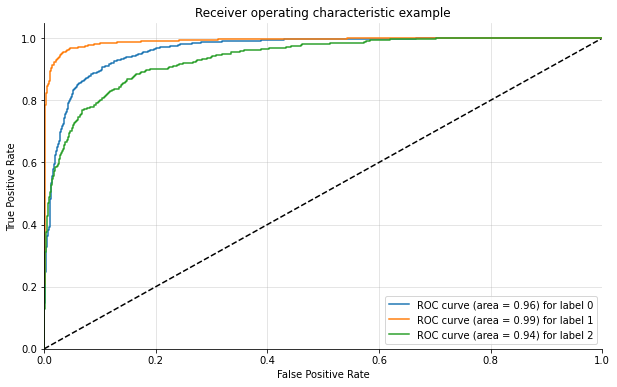

In [33]:
plot_multiclass_roc(log_model, X_train, y_train, n_classes=3, figsize=(10, 6))

### Logistic Model with GridsearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
log_model_grid = LogisticRegression(random_state=42, class_weight='balanced', max_iter=5000)

In [36]:
param_grid = {"C" : np.logspace(0.01, 1, 10),
           "penalty" : ['l1', 'l2'],
            "class_weight" : ["balanced", None],
            "solver" : ["lbfgs", "liblinear", "sag", "saga"] }

log_grid_model = GridSearchCV(log_model_grid, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

<IPython.core.display.Javascript object>

In [37]:
log_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([ 1.02329299,  1.31825674,  1.69824365,  2.18776162,  2.81838293,
        3.63078055,  4.67735141,  6.02559586,  7.76247117, 10.        ]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             verbose=2)

In [38]:
log_grid_model.best_params_

{'C': 4.677351412871983,
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [39]:
#  To see scores and evaluate Logistic Regression model with GirdSearchCV...
log_grid_model_eval = eval_metric(log_grid_model, X_train, y_train, X_test, y_test)
log_grid_model_eval

Test_Set
[[728  12  18]
 [ 22 237   1]
 [ 52   7  77]]
              precision    recall  f1-score   support

           1       0.91      0.96      0.93       758
           2       0.93      0.91      0.92       260
           3       0.80      0.57      0.66       136

    accuracy                           0.90      1154
   macro avg       0.88      0.81      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[2961   25   48]
 [  59  972    7]
 [ 199   29  315]]
              precision    recall  f1-score   support

           1       0.92      0.98      0.95      3034
           2       0.95      0.94      0.94      1038
           3       0.85      0.58      0.69       543

    accuracy                           0.92      4615
   macro avg       0.91      0.83      0.86      4615
weighted avg       0.92      0.92      0.92      4615



Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits


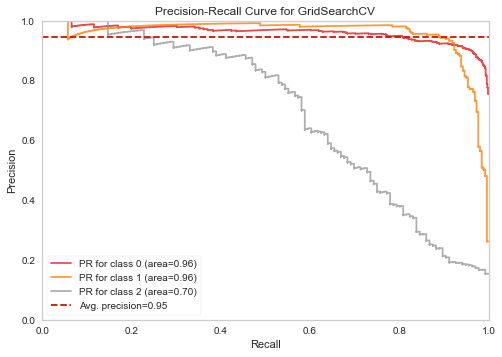

In [40]:
from yellowbrick.classifier import PrecisionRecallCurve

model = log_grid_model
viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### 3.b) Support Vector Machines

I will use pipeline in SVM

In [41]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [58]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(random_state=42, class_weight = 'balanced'))]
pipe_model = Pipeline(steps=operations)

In [59]:
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)

In [60]:
svc_pipe_model_eval = eval_metric(pipe_model, X_train, y_train, X_test, y_test)
svc_pipe_model_eval

Test_Set
[[609  23 126]
 [ 11 241   8]
 [ 30   6 100]]
              precision    recall  f1-score   support

           1       0.94      0.80      0.87       758
           2       0.89      0.93      0.91       260
           3       0.43      0.74      0.54       136

    accuracy                           0.82      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[2603   54  377]
 [  45  959   34]
 [  62   18  463]]
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      3034
           2       0.93      0.92      0.93      1038
           3       0.53      0.85      0.65       543

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



###  SVM Model with GridsearchCV

In [54]:
param_grid = {'SVC__C': [0.01, 0.1, 1, 2],
              'SVC__gamma': ["auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

In [55]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model=Pipeline(steps=operations)

svc_grid_model = GridSearchCV(pipe_model, param_grid, verbose = 2, cv=5, n_jobs = -1)

In [56]:
svc_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1, 2],
                         'SVC__gamma': ['auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             verbose=2)

In [61]:
svc_grid_model.best_params_

{'SVC__C': 2, 'SVC__gamma': 0.3, 'SVC__kernel': 'rbf'}

In [62]:
svc_grid_model_eval = eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[659  16  83]
 [ 16 239   5]
 [ 39  11  86]]
              precision    recall  f1-score   support

           1       0.92      0.87      0.90       758
           2       0.90      0.92      0.91       260
           3       0.49      0.63      0.55       136

    accuracy                           0.85      1154
   macro avg       0.77      0.81      0.79      1154
weighted avg       0.87      0.85      0.86      1154


Train_Set
[[2835   17  182]
 [  10 1019    9]
 [   9    3  531]]
              precision    recall  f1-score   support

           1       0.99      0.93      0.96      3034
           2       0.98      0.98      0.98      1038
           3       0.74      0.98      0.84       543

    accuracy                           0.95      4615
   macro avg       0.90      0.96      0.93      4615
weighted avg       0.96      0.95      0.95      4615



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


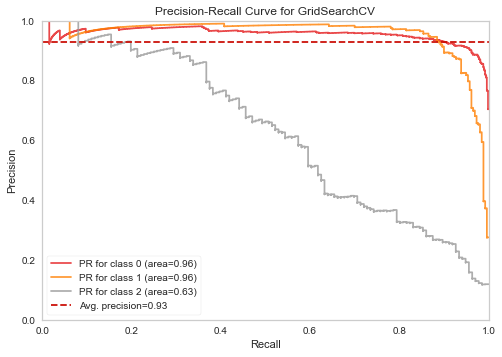

In [63]:
# Precision-Recall Curve for SVM GridSearchCV model
model = svc_grid_model
viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## Comparison and Evaluation of the Models

1- As it is seen from the comparison of models in terms of precision, recall and f1-scores in test set, we have received higher scores for three categories (White, Black and Hispanic) in Logistic Model with GridSearchCV. 

2-Since we have unbalanced data, I also checked the Precision-Recall Curve. It shows that we have better result for Hispanic category in Logistic Regression.

3-When we compare these three categories(White, Black and Hispanic), we see  that Hispanic has the lowest test scores. This is an expected result because we have unbalanced data and Hispanic category has the least number of observations among three categories. One solution to get better scores might be to balance data through SMOTE to have higher scores in Hispanic category.

4-Lastly, this data can be tested with tree-based models. I would recommend to implement Random Forest and XGBoost models to see whether we would improve the scores especially for Hispanic category.